<a href="https://colab.research.google.com/github/Tomaz4lves/Biblioteca_pandas/blob/main/M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [39]:
#Carregando dados
df_abt = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')
df_abt.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [40]:
#Limpando nulos
df_abt = df_abt.dropna()

In [41]:
df_abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [42]:
#Train-Test Split
X = df_abt[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_abt['Personal_Loan'].copy()
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [43]:
#Treinando o modelo de Regressão Log[istica
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#Previsão usando Regressão Logística
lr.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [45]:
#Criando a coluna Churn
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CreditCard,Securities_Account,CD_Account,Online,churn,label
1641,58,34,152,4,3.6,3,0,0,0,0,0,1,1
4277,40,16,138,1,3.5,1,0,0,0,0,1,0,0
3246,41,17,81,1,0.8,2,223,0,0,0,1,0,0
2889,53,29,33,3,1.9,2,144,0,0,0,0,0,0
1439,59,29,61,1,1.4,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,34,8,82,2,1.5,3,0,1,1,1,1,0,0
2454,54,29,23,1,1.5,2,0,0,0,0,0,0,0
819,56,30,45,4,1.5,3,0,0,0,0,0,0,0
1203,62,37,50,3,2.4,1,0,0,0,0,1,0,0


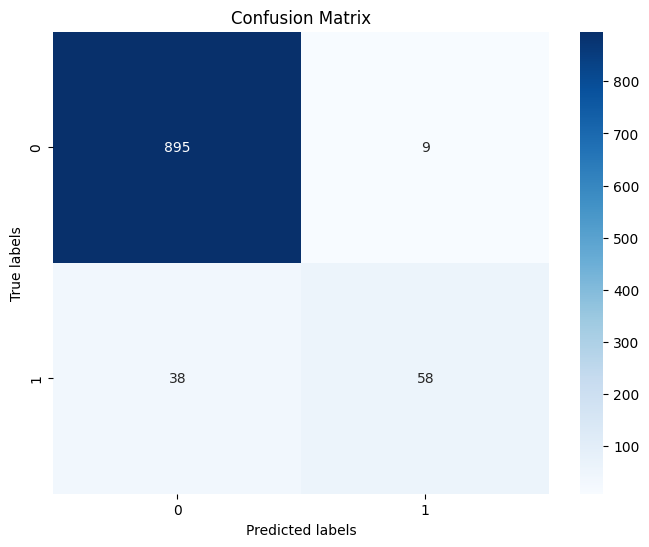

In [46]:
# Fazendo previsões
predictions = lr.predict(X_test)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.94775
Acurácia (Teste): 0.953
Acurácia Balanceada (Treino): 0.7907102691740413
Acurácia Balanceada (Teste): 0.7971054572271385
Precision (Treino): 0.8091872791519434
Precision (Teste): 0.8656716417910447
Recall (Treino): 0.5963541666666666
Recall (Teste): 0.6041666666666666
F1-Score (Treino): 0.6866566716641679
F1-Score (Teste): 0.7116564417177914
ROCAUC (Treino): 0.9539769715615781
ROCAUC (Teste): 0.9507858591445427


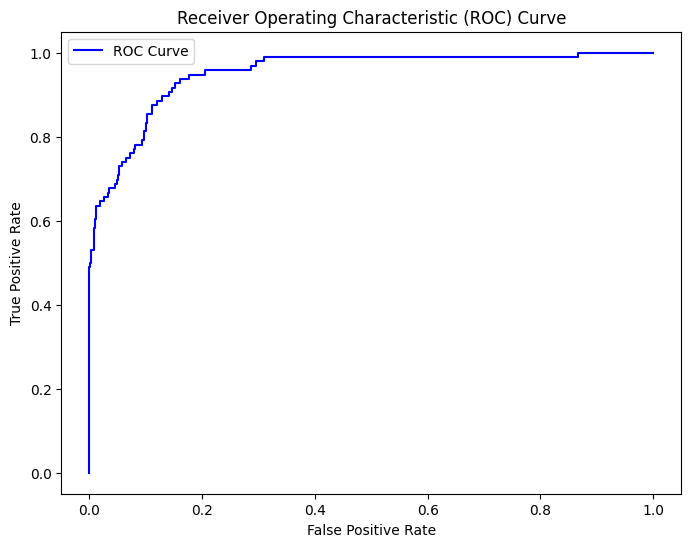

In [57]:
# Fazendo previsões de probabilidade
y_probs = lr.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
#plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [58]:
# Fazendo previsões de probabilidade
y_probs = lr.predict_proba(X_test)[:, 1]

# Calculando o AUC-ROC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc:.2f}')

AUC-ROC: 0.95


In [59]:
#Tabelando Regressão Logística para análise
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.94775,0.790710,0.809187,0.596354,0.686657,0.953977
1,Logistic Regression,teste,0.95300,0.797105,0.865672,0.604167,0.711656,0.950786
